# UN Data Analysis #

### Import Library

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Formatting

In [75]:
%matplotlib inline

### Get Started

In [76]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [77]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [78]:
internet_df = pd.read_csv('../data/internet_use.csv')

In [79]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [80]:
gdp_df.shape

(6729, 4)

In [81]:
internet_df.shape

(4495, 4)

In [82]:
gdp_df.dtypes; 

In [83]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [84]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [85]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [86]:
gdp_df = gdp_df.drop(columns=["Value Footnotes"])

In [87]:
internet_df = internet_df.drop(columns=["Value Footnotes"])

In [88]:
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})

In [89]:
internet_df = internet_df.rename(columns={"Country or Area": "Country", "Value": "Internet_Users_Pct"})

In [90]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [91]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [92]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df)

In [93]:
gdp_and_internet_use_subset = gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2004, 2009, 2014])]

In [94]:
gdp_and_internet_use_subset.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
5,Afghanistan,2009,1502.354073,3.550000
10,Afghanistan,2004,1025.208245,0.105809
13,Albania,2014,10700.993216,60.100000
18,Albania,2009,9525.377979,41.200000


In [95]:
gdp_net_2004 = gdp_and_internet_use_subset[gdp_and_internet_use_subset['Year'] == 2004]

In [96]:
gdp_net_2009 = gdp_and_internet_use_subset[gdp_and_internet_use_subset['Year'] == 2009]

In [97]:
gdp_net_2014 = gdp_and_internet_use_subset[gdp_and_internet_use_subset['Year'] == 2014]

In [98]:
gdp_net_2014['Internet_Users_Pct'].max()

98.16

In [99]:
gdp_net_2014['Internet_Users_Pct'].min()

1.14

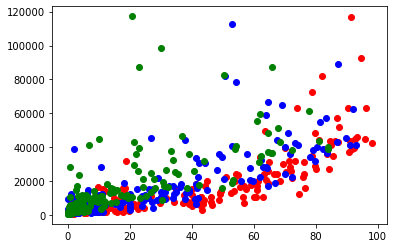

In [100]:
plt.scatter(gdp_net_2014["Internet_Users_Pct"], gdp_net_2014["GDP_Per_Capita"], color='red')
plt.scatter(gdp_net_2009["Internet_Users_Pct"], gdp_net_2009["GDP_Per_Capita"], color='blue')
plt.scatter(gdp_net_2004["Internet_Users_Pct"], gdp_net_2004["GDP_Per_Capita"], color='green')

Relationship between the variables seems similar over time with the Percentage of Internet Use increasing steadily, and GDP per capita increasing, but more gradually. Each data series is unimodal for each year.

In [109]:
internet_df_2014 = internet_df[internet_df["Year"] == 2014]
internet_df_2014.sort_values(by="Internet_Users_Pct", ascending=False)

,Country,Year,Internet_Users_Pct
1866,Iceland,2014,98.16
415,Bermuda,2014,96.80
3016,Norway,2014,96.30
1083,Denmark,2014,95.99
59,Andorra,2014,95.90
...,...,...,...
3648,Somalia,2014,1.63
623,Burundi,2014,1.38
4019,Timor-Leste,2014,1.14
1256,Eritrea,2014,0.99


In [117]:
top_5_internet = internet_df[internet_df["Country"].isin(["Iceland", "Bermuda", "Norway", "Denmark", "Andorra"])]
top_5_internet.shape


(115, 3)

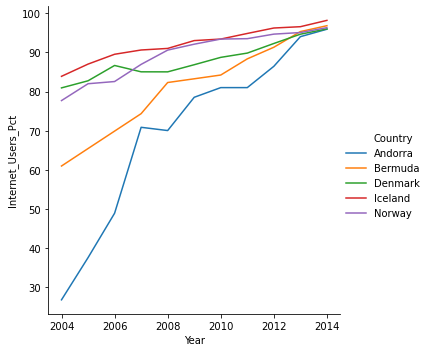

In [119]:
top_5_internet = top_5_internet[top_5_internet["Year"] > 2003]
sns.relplot(data=top_5_internet, x="Year", y="Internet_Users_Pct", kind="line", hue="Country")

In [121]:
internet_df_2014 = internet_df[internet_df["Year"] == 2014]
internet_df_2014.sort_values(by="Internet_Users_Pct", ascending=True)

,Country,Year,Internet_Users_Pct
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
4019,Timor-Leste,2014,1.14
623,Burundi,2014,1.38
3648,Somalia,2014,1.63
...,...,...,...
59,Andorra,2014,95.90
1083,Denmark,2014,95.99
3016,Norway,2014,96.30
415,Bermuda,2014,96.80


In [123]:
bottom_5_internet = internet_df[internet_df["Country"].isin(["Dem. People's Rep. of Korea", "Eritrea", "Timor-Leste", "Burundi", "Somalia"])]
bottom_5_internet.shape

(112, 3)

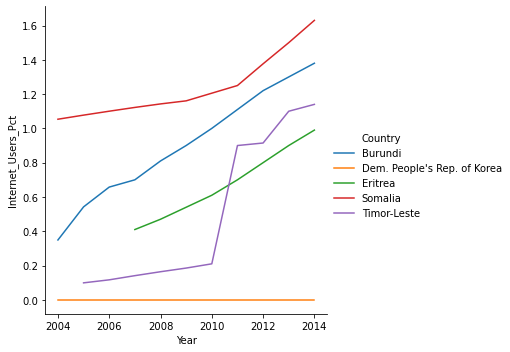

In [125]:
bottom_5_internet = bottom_5_internet[bottom_5_internet["Year"] > 2003]
sns.relplot(data=bottom_5_internet, x="Year", y="Internet_Users_Pct", kind="line", hue="Country")

In [127]:
gdp_df_2014 = gdp_df[gdp_df["Year"] == 2014]
gdp_df_2014.sort_values(by="GDP_Per_Capita", ascending=False)

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329
...,...,...,...
3697,Malawi,2014,1142.530804
4414,Niger,2014,900.136918
1375,Dem. Rep. Congo,2014,784.872656
794,Burundi,2014,768.469837


In [128]:
top_5_gdp = gdp_df[gdp_df["Country"].isin(["Macao SAR, China", "Qatar", "Luxembourg", "Singapore", "Brunei"])]
top_5_gdp.shape

(135, 3)

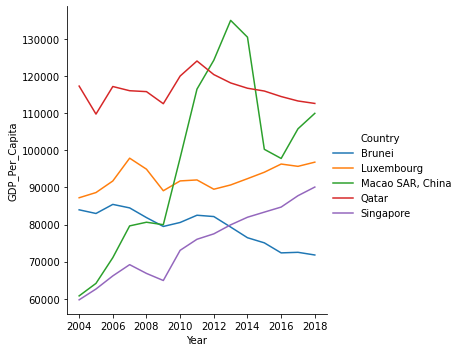

In [130]:
top_5_gdp = top_5_gdp[top_5_gdp["Year"] > 2003]
sns.relplot(data=top_5_gdp, x="Year", y="GDP_Per_Capita", kind="line", hue="Country")

In [131]:
gdp_df_2014 = gdp_df[gdp_df["Year"] == 2014]
gdp_df_2014.sort_values(by="GDP_Per_Capita", ascending=True)

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


In [134]:
bottom_5_gdp = gdp_df[gdp_df["Country"].isin(["Central African Republic", "Burundi", "Dem. Rep. Congo", "Niger", "Malawi"])]
bottom_5_gdp.shape

(145, 3)

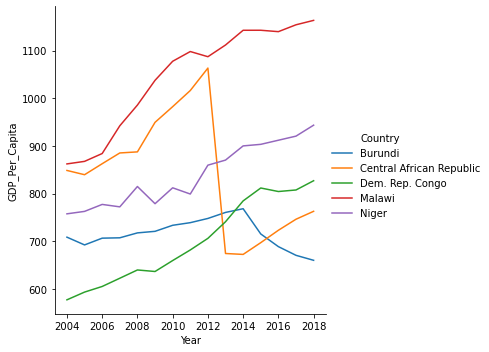

In [135]:
bottom_5_gdp = bottom_5_gdp[bottom_5_gdp["Year"] > 2003]
sns.relplot(data=bottom_5_gdp, x="Year", y="GDP_Per_Capita", kind="line", hue="Country")